# Seminar 8 - Mixed Effects Models

## Analysis of Longitudinal Data
To study the growth of children, the distance from the pituitary gland to the pterygomaxillary
fissure is measured every two years from 8 years of age until 14 years of age. A sample of 27
children — 16 males and 11 females was obtained by orthodontists from x-rays of the children’s
skulls. (The dataset is denoted by Orthodont.)

In [1]:
library("nlme")
data(Orthodont)
head(Orthodont)

,distance,age,Subject,Sex
,<dbl>,<dbl>,<ord>,<fct>
1,26.0,8,M01,Male
2,25.0,10,M01,Male
3,29.0,12,M01,Male
4,31.0,14,M01,Male
5,21.5,8,M02,Male
6,22.5,10,M02,Male


1. Download the data and fit a simple linear regression model: distance vs age. Interpret the
estimates for intercept and slope, comment on the model fit. Is it a good way to analyze
such data? Which data aspect was ignored?

In [4]:
m.lm = lm(distance ~ age, data = Orthodont)
summary(m.lm)


Call:
lm(formula = distance ~ age, data = Orthodont)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5037 -1.5778 -0.1833  1.3519  6.3167 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  16.7611     1.2256  13.676  < 2e-16 ***
age           0.6602     0.1092   6.047 2.25e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.537 on 106 degrees of freedom
Multiple R-squared:  0.2565,	Adjusted R-squared:  0.2495 
F-statistic: 36.56 on 1 and 106 DF,  p-value: 2.248e-08


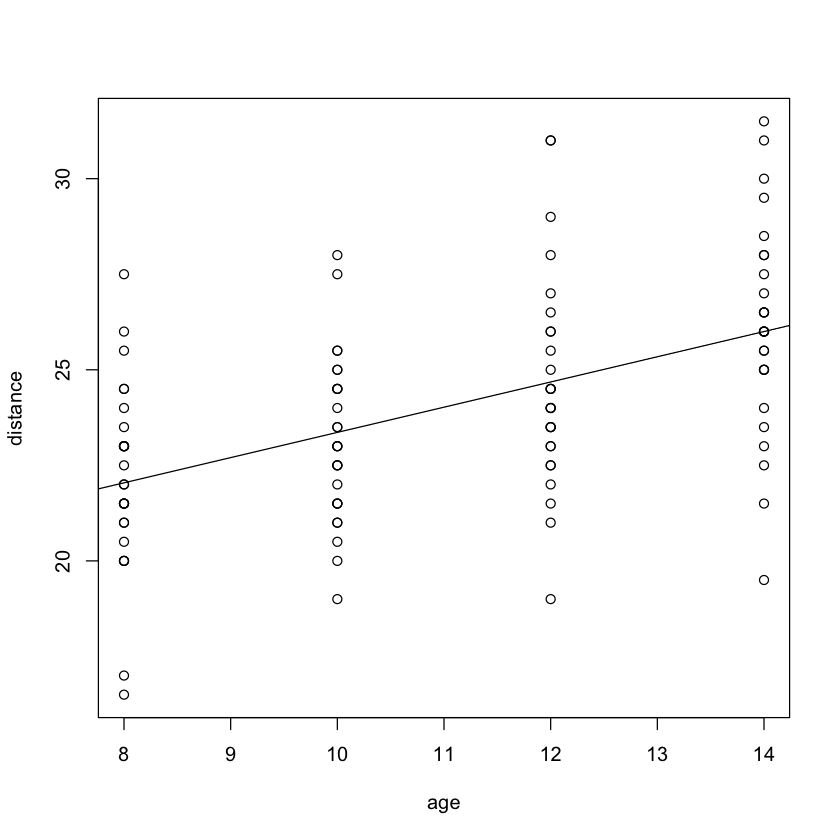

In [5]:
plot(distance ~ age, data = Orthodont)
abline(m.lm["coefficients"])

2. Fit separate linear regression models for each child. To check the variability of estimates
across individuals, plot confidence intervals from all models. How well do the confidence
intervals overlap? Based on this, we would decide whether we need random effects for the
corresponding parameters.

In [34]:
# cis <- c()
# for (subject in unique(Orthodont$Subject)) {
#     s <- subset(Orthodont, Orthodont$Subject == subject)
#     m <- lm(distance ~ age, data = s)

#     cf <- seq(min(s$age), max(s$age), by = 0.05)
#     ci <- predict(m, newdata=data.frame(age=cf), interval="confidence", level = 0.95)
#     cis <- c(cis, c(cf, ci))

#     plot(s$age, s$distance, xlab="Age", ylab="Distance", main="Regression")
#     abline(m, col="lightblue")
#     lines(cf, ci[,2], col="blue", lty=2)
#     lines(cf, ci[,3], col="blue", lty=2)
# }

## To fit LR models for each child separately:
fm1Orth.lis <- lmList(distance ~ age | Subject, data = Orthodont)
## To plot confidence intervals:
plot(intervals(fm1Orth.lis))

ERROR: Error in UseMethod("intervals"): no applicable method for 'intervals' applied to an object of class "c('lmList4', 'list', 'vector')"


3. Using the R package `nlme`, fit a linear mixed effects model with random effects for both
intercept and slope. Compare with individual naive lm fit and notice that that the estimates
are more efficient (SE are reduced).

In [7]:
library("nlme")

m.lme = lme(distance ~ age, random = age ~ Sex, data = Orthodont)
summary(m.lme)
# plot(distance ~ age, data = Orthodont)
# abline(m1["coefficients"])

Linear mixed-effects model fit by REML
  Data: Orthodont 
      AIC      BIC   logLik
  458.152 474.1327 -223.076

Random effects:
 Formula: age ~ Sex | Subject
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev   Corr  
(Intercept) 1.777925 (Intr)
SexFemale   2.439702 -0.287
Residual    1.431591       

Fixed effects:  distance ~ age 
                Value Std.Error DF  t-value p-value
(Intercept) 17.100043 0.7929730 80 21.56447       0
age          0.660185 0.0616059 80 10.71627       0
 Correlation: 
    (Intr)
age -0.855

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-3.69175063 -0.53401055 -0.02450236  0.50217036  3.71700197 

Number of Observations: 108
Number of Groups: 27 

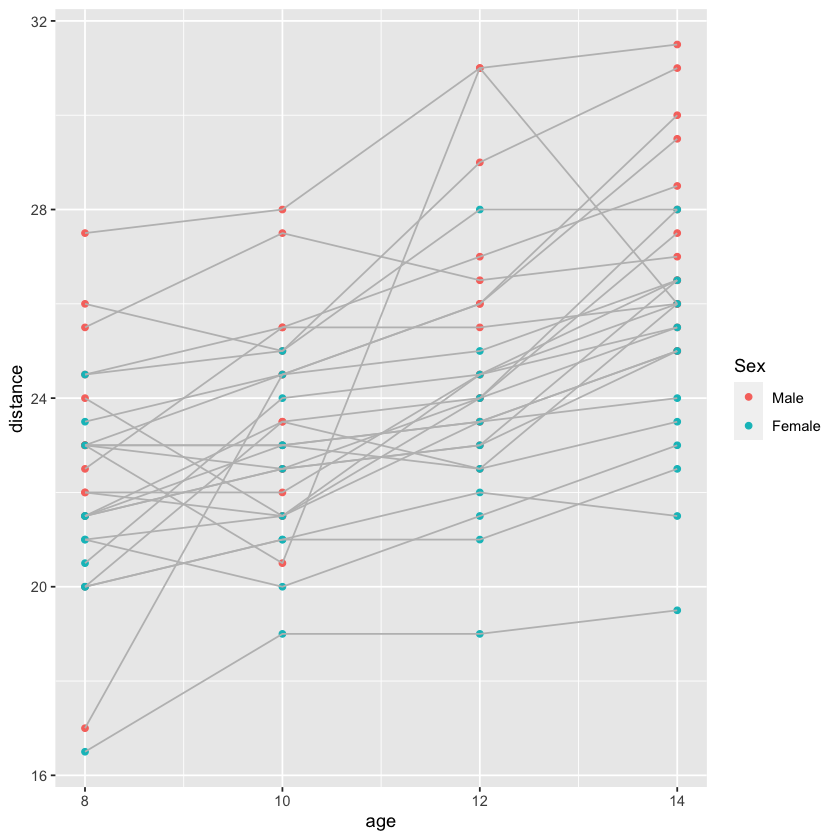

In [8]:
library("ggplot2")

ggplot(Orthodont, aes(x = age, y = distance, group = Subject, color=Sex)) + 
  geom_point() +
  geom_line(color = "gray")

4. Using the R package `lmerTest`, fit a linear mixed effects model with random effects for both
intercept and slope. Compare the fit results with those obtained from `nlme`.

In [18]:
library("lmerTest")
m.lmer = lmer(distance ~ age + (age|Subject), data = Orthodont)

5. Using `anova()` command compare the LME model, fitted by either of the two ways above,
with the lm model without random effects. Check AIC and BIC values to conclude which
model fits better. What is the p-value for the likelihood ratio test?

In [19]:
(aov <- anova(m.lm))
(aov <- anova(m.lmer))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,235.3560,235.356019,36.56224,2.247731e-08
Residuals,106,682.3361,6.437133,NA,NA


,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
age,147.3182,147.3182,1,25.99803,85.84187,1.014493e-09


6. To test the difference between boys and girls, fit a model with the $sex*age$ interaction.Use
the `anova()` command to see whether the interaction is significant.

# Practice Test
Download the orthodont data set and consider age as a factor variable. Using the function lmer() from the R package lmerTest, fit the linear mixed effects model with random intercept for Subject, distance as response, and age, Sex, and their interaction as predictors. Based on this model, answer the following questions.

In [21]:
m.test = lmer(distance ~ age * Sex + age:Sex + (1|Subject), data = Orthodont)

## Question A
The estimate of the standard deviation which characterizes "between-subject" variability in the data is equal to ???.

In [28]:
summary(m.test)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: distance ~ age * Sex + age:Sex + (1 | Subject)
   Data: Orthodont

REML criterion at convergence: 433.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5980 -0.4546  0.0158  0.5024  3.6862 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 3.299    1.816   
 Residual             1.922    1.386   
Number of obs: 108, groups:  Subject, 27

Fixed effects:
              Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)    16.3406     0.9813 103.9864  16.652  < 2e-16 ***
age             0.7844     0.0775  79.0000  10.121 6.44e-16 ***
SexFemale       1.0321     1.5374 103.9864   0.671   0.5035    
age:SexFemale  -0.3048     0.1214  79.0000  -2.511   0.0141 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) age    SexFml
age         -0.869              
SexFemale   -0.638  0

## Question B
Across all ages, the distance for boys is on average ??? greater than the distance for girls.

In [43]:
boys = subset(Orthodont, Orthodont$Sex == "Male")
girls = subset(Orthodont, Orthodont$Sex == "Female")

mean(boys$distance) - mean(girls$distance)

[1] 2.321023

## Question C
At which age the average difference in the outcome between boys and girls is the smallest?  Give your answer here:  

In [16]:
10 # pure guess

[1] 10